In [2]:
import matplotlib.pylab as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive)
subdir = data_dir / "flower_photos"
print(subdir)

C:\Users\gina0\.keras\datasets\flower_photos.tgz\flower_photos


In [4]:
def read_and_decode(filename, reshape_dims):
    
    # read files
    image = tf.io.read_file(filename)
    
    #channel is color channel
    image = tf.image.decode_jpeg(image, channels=3)

    # Convert 3D uint8 to float in the [0,1] range. 
    # Originally the pixels constis of RGB values that are of type uint8 and are in the range [0,255]
    # Convert to floats and scale the values to lie in the range [0,1] because machine learning optimizers are tuned to work well with small numbers.
    image = tf.image.convert_image_dtype(image, tf.float32)

    return tf.image.resize(image, reshape_dims)

In [5]:

def show_image(filename):
    image = read_and_decode(filename, [224,224])
    plt.imshow(image.numpy())

NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} Error executing an HTTP request: HTTP response code 404 with body '<?xml version='1.0' encoding='UTF-8'?><Error><Code>NoSuchBucket</Code><Message>The specified bucket does not exist.</Message></Error>'
	 when reading gs://clous-ml-data/img/flower_photos/daisy/754296579_39a9ae917c)n.jpg [Op:ReadFile]

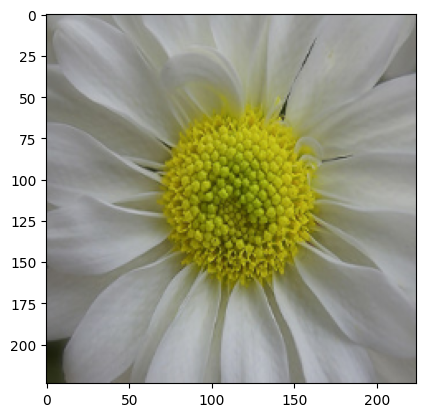

In [7]:
roses = list(subdir.glob("roses/*"))
daisy = list(subdir.glob("daisy/*.jpg"))
show_image(str(daisy[0]))
show_image("gs://clous-ml-data/img/flower_photos/daisy/754296579_39a9ae917c)n.jpg")